<a href="https://colab.research.google.com/github/Smartsie/Optimizer/blob/master/PyMC3_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install pymc3==3.8
!pip install arviz

In [16]:
import pymc3 as pm
from pymc3 import  *
#from arviz.plots import traceplot
import numpy as np
import theano.tensor as tt
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [0]:

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

In [0]:

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 2*3.1415, size)
# y = a + b*x
#true_regression_line = true_intercept + true_slope * x
# add noise
#y = true_regression_line + np.random.normal(scale=.5, size=size)
y=2*x*np.sin(1+x*2)+np.random.normal(scale=.05, size=size)

data = dict(x=x, y=y)

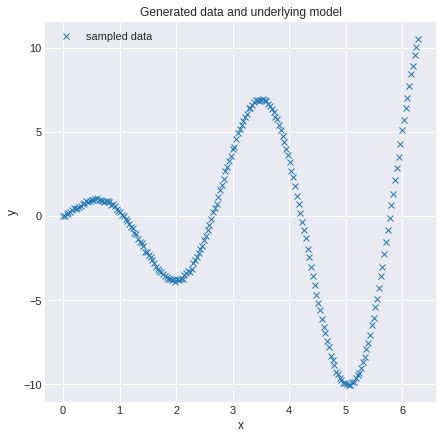

In [31]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
#ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [20]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.Normal('sigma', 0, sigma=1)
    intercept = pm.Normal('Intercept', 1, sigma=1)
    x_coeff = pm.Normal('x', 0, sigma=1)

    # Define likelihood
    likelihood = pm.Normal('y', mu=intercept + x_coeff * x,
                        sigma=sigma, observed=y)

    # Inference!
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]
Sampling 2 chains, 0 divergences: 100%|██████████| 7000/7000 [00:08<00:00, 832.73draws/s]


In [32]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.Normal('sigma', 0, sigma=1)
    A = pm.Normal('Intercept', 1, sigma=1)
    phase = pm.Normal('phase', 0, sigma=1)
    C = pm.Normal('x', 0, sigma=1)

#y=2*x*np.sin(1+x*2)+np.random.normal(scale=.5, size=size)
    # Define likelihood
    likelihood = pm.Normal('y', mu=A * x*np.sin(phase+C*x),
                        sigma=sigma, observed=y)

    # Inference!
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, phase, Intercept, sigma]
Sampling 2 chains, 0 divergences: 100%|██████████| 7000/7000 [00:27<00:00, 250.93draws/s]
The acceptance probability does not match the target. It is 0.9773379680375454, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9590014627058968, but should be close to 0.8. Try to increase the number of tuning steps.


In [0]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    glm.GLM.from_formula('y ~ x', data)
    trace = sample(3000, cores=2) # draw 

In [0]:
!

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


<Figure size 504x504 with 0 Axes>

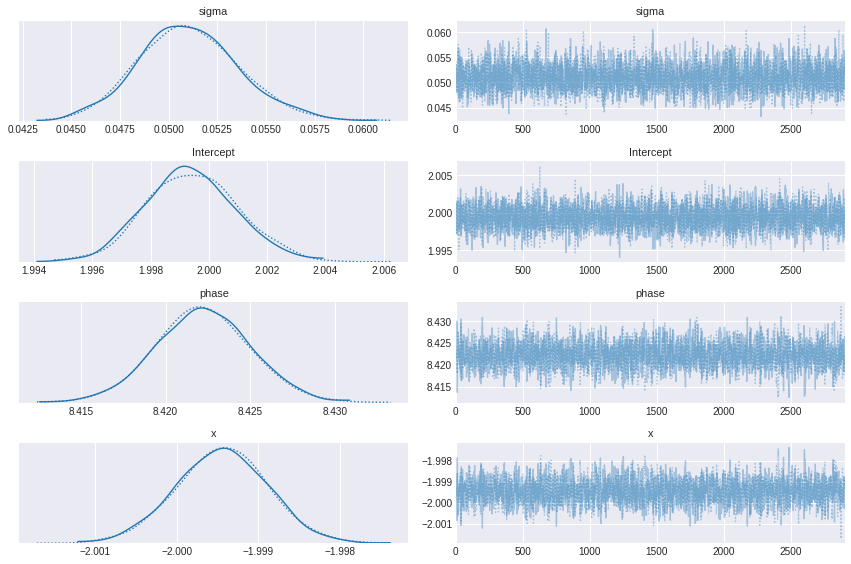

In [33]:

plt.figure(figsize=(7, 7))
pm.traceplot(trace[100:])
plt.tight_layout();

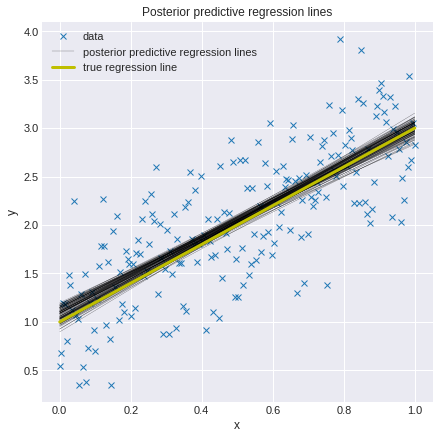

In [9]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
plot_posterior_predictive_glm(trace, samples=100,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');